# 第 2 章  神经网络基础  —— 习题解答

## 2.1
多层感知机和感知机的区别是什么？为什么会有这样的区别？

**答：**

感知机和多层感知机的主要区别可以概括为以下几点：

1. 结构
感知机：

感知机是最基本的神经网络结构，通常只包含一个输入层和一个输出层。每个输入节点与输出节点之间都有权重连接。
感知机只能处理线性可分的问题。
多层感知机（MLP）：

MLP包含一个或多个隐藏层（即在输入层和输出层之间的层），每个隐藏层也包含多个神经元。
通过增加隐藏层，MLP可以学习复杂的非线性关系，从而能够解决更复杂的问题（如图像识别、自然语言处理等）。
2. 激活函数
感知机：

感知机通常使用简单的阈值函数（激活函数），如阶跃函数，来决定输出。
这使得感知机只能进行线性分割，无法处理复杂模式。
多层感知机（MLP）：

MLP使用非线性激活函数（如Sigmoid、ReLU、Tanh等），这使得网络能够学习和表示复杂的非线性关系。
非线性激活函数允许网络在每个层之间引入复杂性，从而增强了模型的表达能力。
3. 学习能力
感知机：

感知机只能解决线性可分的问题，无法处理非线性可分的问题。因此，对于一些复杂的数据集，感知机的表现非常有限。
其输出是基于线性组合的，且只能进行二分类。
多层感知机（MLP）：

MLP能够通过多层结构和非线性激活函数来学习和表示复杂的函数映射，因此可以处理各种类型的任务，包括多分类问题。
MLP可以使用反向传播算法进行训练，这样可以有效地更新网络中的权重。
4. 应用
感知机：

由于其局限性，感知机在现代机器学习中很少单独使用，主要用于教学和理解基本的神经网络概念。
多层感知机（MLP）：

MLP在许多实际应用中被广泛使用，如图像识别、语音识别、自然语言处理等，特别是在深度学习的背景下，MLP作为更复杂网络（如卷积神经网络CNN、循环神经网络RNN等）的基础组件之一。
为什么会有这样的区别？
线性与非线性：感知机的线性性质限制了它的应用范围，因此引入多个层和非线性激活函数的想法是为了扩展神经网络的能力，使其能够处理更复杂的数据模式。

神经网络的深度：随着计算能力的提高和数据量的增加，深度学习（包括多层感知机）能够有效地从数据中学习复杂的特征，这一趋势促使神经网络的发展。

反向传播算法：多层感知机的学习能力得益于反向传播算法的引入，使得在深层网络中进行有效的权重更新成为可能。

## 2.2 
假设有一个只有1个隐层的多层感知机，其输入、隐层、输出层的神经元个数分别为33、512、10，那么这个多层感知机中总共有多少个参数是可以被训练的？

**答：**

输入层和隐层之间权重`W`的个数为`33 * 512 = 16896`，加上`512`个偏置`b`后共`17408`个参数。

隐层和输出层之间权重`W`的个数为`512 * 10 = 5120`，加上`10`个偏置`b`后共`5130`个参数。

二者相加，这个多层感知机中可被训练的参数共有`17408 + 5130 = 22538`个。

## 2.3
反向传播中，神经元的梯度是如何计算的？权重是如何更新的？

## 2.4
请在同一个坐标系内画出五种不同的激活函数图像，并比较它们的取值范围。

In [43]:
t = np.random.rand(5)
t

array([0.46998409, 0.07250684, 0.9327951 , 0.17559543, 0.57461228])

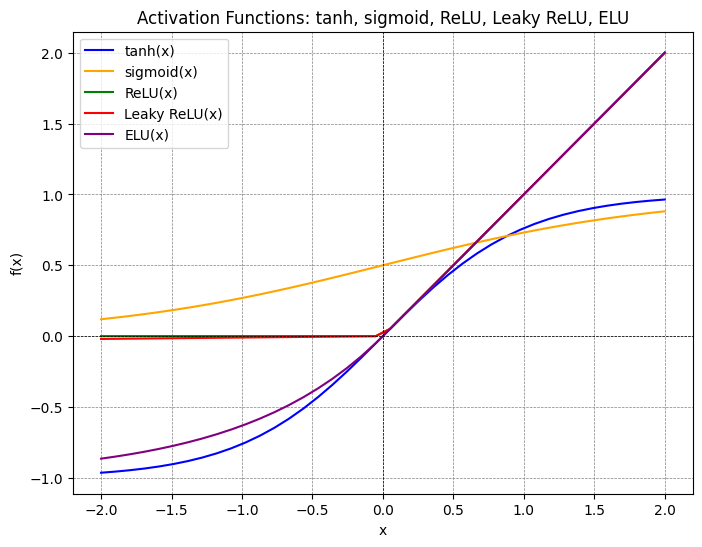

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create an array of values from -10 to 10
x = np.linspace(-2, 2, 40)

# Calculate the functions
tanh_values = np.tanh(x)
sigmoid_values = 1 / (1 + np.exp(-x))
relu_values = np.maximum(0, x)
leaky_relu_values = np.where(x > 0, x, 0.01 * x)  # Leaky ReLU with alpha = 0.01
elu_values = np.where(x > 0, x, np.exp(x) - 1)    # ELU with alpha = 1

# Create the plot
plt.figure(figsize=(8, 6))

# Plot each function
plt.plot(x, tanh_values, label='tanh(x)', color='blue')
plt.plot(x, sigmoid_values, label='sigmoid(x)', color='orange')
plt.plot(x, relu_values, label='ReLU(x)', color='green')
plt.plot(x, leaky_relu_values, label='Leaky ReLU(x)', color='red')
plt.plot(x, elu_values, label='ELU(x)', color='purple')

# Add title and labels
plt.title('Activation Functions: tanh, sigmoid, ReLU, Leaky ReLU, ELU')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show the plot
plt.show()

## 2.5
请简述三种避免过拟合问题的方法。

## 2.6
sigmoid激活函数的极限是0和1，请给出它的导数形式并求出其在原点的导数值。

答：

$$
\begin{equation}
\begin{aligned}
\sigma'(x) &= (\frac{1}{1 + {e}^{-x}})'\\
&= ((1 + {e}^{-x})^{-1})'\\
&= (-1)\cdot(1+{e}^{-x})^{-2}\cdot{e}^{-x}\cdot(-1)\\
&= \frac{{e}^{-x}}{(1+{e}^{-x})^{2}}\\
&= \frac{{e}^{-x}}{(1+{e}^{-x})^{2}}\\
&= \frac{1}{1+{e}^{-x}}\cdot\frac{{e}^{-x}}{1+{e}^{-x}}\\
&= \frac{1}{1+{e}^{-x}}\cdot\frac{1+{e}^{-x}-1}{1+{e}^{-x}}\\
&= \frac{1}{1+{e}^{-x}}\cdot(1-\frac{1}{1+{e}^{-x}})\\
&= \sigma(x)\cdot(1 - \sigma(x))
\end{aligned}
\end{equation}
$$

$$
\begin{equation}
\begin{aligned}
\sigma'(x)|_{x=0} &= \sigma(x)\cdot(1 - \sigma(x))|_{x=0}\\
&= \sigma(0)\cdot(1 - \sigma(0))\\
&= \frac{1}{2}\cdot(1 - \frac{1}{2})\\
&= \frac{1}{4}
\end{aligned}
\end{equation}
$$

## 2.7 

假设激活函数的表达式为

$$\phi(v) = \frac{v}{\sqrt{1 + {v}^2}}$$

请给出它的导数表达式并求出其在原点的取值。

答：

$$
\begin{equation}
\begin{aligned}
{\phi}'(v) &= (\frac{v}{\sqrt{1+{v}^2}})'\\
&= [v\cdot(1 + {v}^2)^{-\frac{1}{2}}]'\\
&= {v}'\cdot(1+{v}^2)^{-\frac{1}{2}} + v\cdot[(1 + {v}^2)^{-\frac{1}{2}}]'\\
&= (1+{v}^2)^{-\frac{1}{2}} + v\cdot[-\frac{1}{2}\cdot(1 + {v}^2)^{-\frac{3}{2}}\cdot2v]\\
&= (1+{v}^2)^{-\frac{1}{2}} - {v}^2\cdot(1 + {v}^2)^{-\frac{3}{2}}\\
&= \frac{1}{\sqrt{1+{v}^2}} - \frac{{v}^2}{\sqrt{(1+{v}^2)^3}}\\
&= \frac{1}{\sqrt{1+{v}^2}} - \frac{{v}^2}{(1+{v}^2)\sqrt{1+{v}^2}}\\
&= \frac{1+{v}^2}{(1+{v}^2)\sqrt{1+{v}^2}} - \frac{{v}^2}{(1+{v}^2)\sqrt{1+{v}^2}}\\
&= \frac{1}{(1+{v}^2)\sqrt{1+{v}^2}}\\
&= (1+{v}^2)^{-\frac{3}{2}}
\end{aligned}
\end{equation}
$$

$$
\begin{equation}
\begin{aligned}
{\phi}'(v)|_{v=0} &= (1+{v}^2)^{-\frac{3}{2}}|_{v=0}\\
&= 1
\end{aligned}
\end{equation}
$$

## 2.8

假设基本采用表2.1中的符号，一个经过训练的有两个隐层的MLP如何决定各个3输出神经元的标签？预测过程中，当前输入的样本的标签如何决定？

## 2.9

一种更新权重的方法是引入动量项，即

$$\Delta \omega(n) = \alpha \Delta \omega(n - 1) + \alpha^2 \Delta \omega(n - 2) + \cdots$$

动量项$\alpha$的取值范围通常为`[0, 1]`，这样取值对于权重更新有什么影响？如果取值范围为`[-1, 0]`呢？

## 2.10

反向传播中，采用不同的激活函数对于梯度的计算有什么不同？请设计一个新的激活函数并给出神经元的梯度计算公式。

## 2.11

请设计一个多层感知机实现4位全加器的功能，即两个4比特输入得到一个4比特输出及一个1比特进位。请自行构建训练集、测试集，完成训练及测试。

**答：**

> 注：按照全加器的定义，输入应该包括两个4位二进制数`A`和`B`，一个进位输入`Cin`。输出则是4位的和`Sum`和1位的进位`Cout`，这里题目给出的应该是半加器的解释，下面我们按照半加器来处理这个问题。

以下是半加器输入和输出的示例：

|A（4位）| B（4位）| Sum（4位）| Cout（1位）|
|---|---|---|---|
|0000 | 0000 | 0000 | 0 |
|0001 | 0000 | 0001 | 0 |
|0001 | 0001 | 0010 | 0 |
|0010 | 0001 | 0011 | 0 |
|1111 | 1111 | 1110 | 1 |

这里我们选择通过`sklearn`构建一个多层感知机来解决问题。

In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
x1 = np.random.randn(10)
x2 = np.random.randn(10)

In [62]:
y1 = np.exp(x1)
y2 = np.exp(x2)

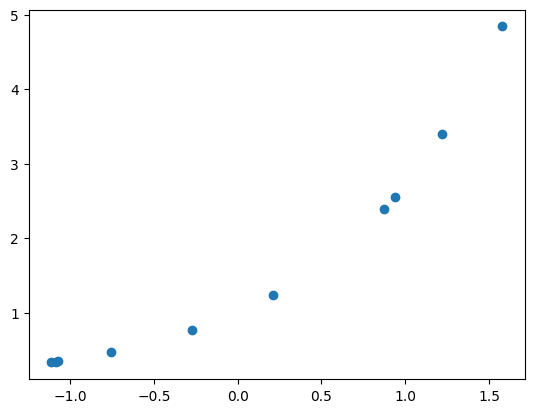

In [64]:
plt.scatter(x1, y1,)

## 2.12

请在不使用任何编程框架的前提下，重新实现解决习题2.11的代码。

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List

In [35]:
class MLP:
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        """
        初始化多层感知机模型。

        参数:
            input_size (int): 输入层神经元个数。
            hidden_size (int): 隐层神经元个数。
            output_size (int): 输出层神经元个数。
        """
        # 初始化权重和偏置
        self.weights_input_hidden: np.ndarray = np.random.rand(input_size, hidden_size)
        self.weights_hidden_output: np.ndarray = np.random.rand(hidden_size, output_size)
        self.bias_hidden: np.ndarray = np.random.rand(hidden_size)
        self.bias_output: np.ndarray = np.random.rand(output_size)

    def forward(self, X: np.ndarray) -> np.ndarray:
        """
        前向传播。

        参数:
            X (np.ndarray): 输入数据。

        返回:
            np.ndarray: 输出数据。
        """
        # 前向传播
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)

        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = self.sigmoid(self.output_input)

        return self.output

    def backward(self, X: np.ndarray, y: np.ndarray, learning_rate: float) -> None:
        """
        反向传播并更新权重和偏置。

        参数:
            X (np.ndarray): 输入数据。
            y (np.ndarray): 目标输出数据。
            learning_rate (float): 学习率。
        """
        output_error = y - self.output
        output_delta = output_error * self.sigmoid_derivative(self.output)

        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

        # 更新权重和偏置
        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0) * learning_rate

        self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0) * learning_rate

    def train(self, X: np.ndarray, y: np.ndarray, epochs: int, learning_rate: float) -> None:
        """
        训练模型。

        参数:
            X (np.ndarray): 输入数据。
            y (np.ndarray): 目标输出数据。
            epochs (int): 训练的轮数。
            learning_rate (float): 学习率。
        """
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y, learning_rate)

    def compute_mse(self, X: np.ndarray, y: np.ndarray) -> float:
        """
        计算均方误差。

        参数:
            X (np.ndarray): 输入数据。
            y (np.ndarray): 目标输出数据。

        返回:
            float: 计算得到的均方误差。
        """
        predictions = self.forward(X)
        return np.mean((y - predictions) ** 2)

    def k_fold_cross_validation(self, X: np.ndarray, y: np.ndarray, k: int, epochs: int, learning_rate: float) -> Tuple[List[float], List[float]]:
        """
        K-fold 交叉验证。

        参数:
            X (np.ndarray): 输入数据。
            y (np.ndarray): 目标输出数据。
            k (int): 折数。
            epochs (int): 每次训练的轮数。
            learning_rate (float): 学习率。

        返回:
            Tuple[List[float], List[float]]: 训练误差和测试误差列表。
        """
        fold_size = len(X) // k
        train_errors = []
        test_errors = []

        for i in range(k):
            # 划分训练集和测试集
            X_test = X[i * fold_size:(i + 1) * fold_size]
            y_test = y[i * fold_size:(i + 1) * fold_size]

            X_train = np.concatenate((X[:i * fold_size], X[(i + 1) * fold_size:]), axis=0)
            y_train = np.concatenate((y[:i * fold_size], y[(i + 1) * fold_size:]), axis=0)

            # 创建新模型进行训练
            model = MLP(input_size=X.shape[1], hidden_size=10, output_size=y.shape[1])
            model.train(X_train, y_train, epochs, learning_rate)

            # 计算训练误差和测试误差
            train_mse = model.compute_mse(X_train, y_train)
            test_mse = model.compute_mse(X_test, y_test)

            train_errors.append(train_mse)
            test_errors.append(test_mse)

        return train_errors, test_errors

    def plot_errors(self, train_errors: List[float], test_errors: List[float]) -> None:
        """
        绘制训练误差和测试误差图。

        参数:
            train_errors (List[float]): 训练误差列表。
            test_errors (List[float]): 测试误差列表。
        """
        plt.figure(figsize=(10, 5))
        plt.plot(train_errors, label='Training Error', marker='o')
        plt.plot(test_errors, label='Testing Error', marker='o')
        plt.title('Training and Testing Error over K-fold Cross Validation')
        plt.xlabel('Fold')
        plt.ylabel('Mean Squared Error')
        plt.legend()
        plt.grid()
        plt.show()

    @staticmethod
    def sigmoid(x: np.ndarray) -> np.ndarray:
        """
        Sigmoid 激活函数。

        参数:
            x (np.ndarray): 输入值。

        返回:
            np.ndarray: 根据sigmoid函数计算出的输出值。
        """
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def sigmoid_derivative(x: np.ndarray) -> np.ndarray:
        """
        Sigmoid 激活函数的导数。

        参数:
            x (np.ndarray): Sigmoid函数的输出值。

        返回:
            np.ndarray: Sigmoid函数的导数值。
        """
        return x * (1 - x)  # x is the output of the sigmoid function

    @staticmethod
    def generate_full_adder_dataset() -> Tuple[np.ndarray, np.ndarray]:
        """
        生成4位全加器的训练集。

        返回:
            Tuple[np.ndarray, np.ndarray]: 输入数据和对应的输出数据。
        """
        X = []
        y = []
        for a in range(16):  # 0 to 15 (0000 to 1111)
            for b in range(16):  # 0 to 15 (0000 to 1111)
                # Convert to 4-bit binary representation
                A = [(a >> i) & 1 for i in range(4)]
                B = [(b >> i) & 1 for i in range(4)]
                S = [(a + b) >> i & 1 for i in range(4)]  # Sum
                C = (a + b) >> 4  # Carry out

                # Append to dataset
                X.append(A + B)  # Input: A + B
                y.append(S + [C])  # Output: S + C
        return np.array(X), np.array(y)

In [36]:
# 生成数据
X, y = MLP.generate_full_adder_dataset()

In [37]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [38]:
X.shape

(256, 8)

In [39]:
y

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 1, 1],
       [1, 0, 1, 1, 1],
       [0, 1, 1, 1, 1]])

In [40]:
# K-fold 交叉验证参数
k = 5
epochs: int = 1000
learning_rate: float = 0.01

In [41]:
# 创建模型并进行交叉验证
model = MLP(input_size=X.shape[1], hidden_size=10, output_size=y.shape[1])
train_errors, test_errors = model.k_fold_cross_validation(X, y, k, epochs, learning_rate)

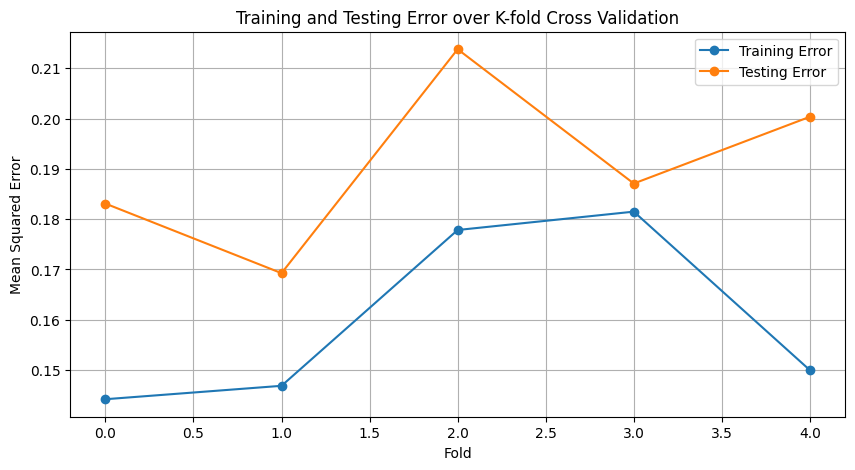

In [42]:
# 绘制误差图
model.plot_errors(train_errors, test_errors)

In [31]:
# 测试模型
def test_full_adder(mlp: MLP) -> None:
    """
    测试4位全加器的输出。

    参数:
        mlp (MLP): 已训练的多层感知机模型。
    """
    test_cases: List[List[int]] = [
        [0, 0, 0, 0, 0, 0, 0, 0],  # 0 + 0
        [0, 0, 0, 1, 0, 0, 0, 1],  # 0 + 1
        [0, 1, 0, 1, 0, 1, 0, 0],  # 1 + 1
        [1, 1, 1, 1, 1, 1, 1, 1],  # 15 + 15
    ]

    for case in test_cases:
        A = case[:4]
        B = case[4:]
        output = mlp.forward([case])
        sum_output = np.round(output[0][:4]).astype(int)
        carry_output = np.round(output[0][4]).astype(int)
        print(f'A: {A}, B: {B} => Output: {sum_output}, Carry: {carry_output}')

In [32]:
# 测试模型
test_full_adder(mlp)

A: [0, 0, 0, 0], B: [0, 0, 0, 0] => Output: [0 0 0 0], Carry: 0
A: [0, 0, 0, 1], B: [0, 0, 0, 1] => Output: [0 0 0 0], Carry: 1
A: [0, 1, 0, 1], B: [0, 1, 0, 0] => Output: [0 0 1 1], Carry: 0
A: [1, 1, 1, 1], B: [1, 1, 1, 1] => Output: [0 1 1 1], Carry: 1
